In [76]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [77]:
class SVM:
    def __init__(self,C=1.0):
        
        self.C=C
        self.w=0
        self.b=0
        
    def hingeloss(self,w,b,x,y):
        reg=0.5*(w*w)
        
        for i in range(x.shape[0]):
            opt_term=y[i]*((np.dot(w,x[i]))+b)
            
            loss=reg+self.C*max(0,1-opt_term)
            
        return loss[0][0]

    def fit(self, X, Y, batch_size=100, learning_rate=0.001, epochs=1000):
           
            number_of_features = X.shape[1]
        
            number_of_samples = X.shape[0]

            c = self.C

           
            ids = np.arange(number_of_samples)

            
            np.random.shuffle(ids)

            
            w = np.zeros((1, number_of_features))
            b = 0
            losses = []

            
            for i in range(epochs):
                
                l = self.hingeloss(w, b, X, Y)

                
                losses.append(l)

                
                for batch_initial in range(0, number_of_samples, batch_size):
                    gradw = 0
                    gradb = 0

                    for j in range(batch_initial, batch_initial + batch_size):
                        if j < number_of_samples:
                            x = ids[j]
                            ti = Y[x] * (np.dot(w, X[x].T) + b)

                            if ti > 1:
                                gradw += 0
                                gradb += 0
                            else:
                                 
                                gradw += c * Y[x] * X[x]
                               
                                gradb += c * Y[x]


                    w = w - learning_rate * w + learning_rate * gradw
                    b = b + learning_rate * gradb

            self.w = w
            self.b = b

            return self.w, self.b, losses  
    
    def predict(self,X):
        
        prediction=np.dot(X,self.w[0])+b
        return np.sign(prediction)
                        
            
        
        
    

In [78]:
X, y = datasets.make_blobs(

        n_samples = 100,
        n_features = 2, 
        centers = 2,
        cluster_std = 1,
        random_state=40
    )

In [79]:
y = np.where(y == 0, -1, 1)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

svm=SVM()

w, b, losses = svm.fit(X_train, y_train)

prediction = svm.predict(X_test)

prediction

array([-1.,  1., -1., -1.,  1.,  1.,  1.,  1., -1.,  1., -1., -1.,  1.,
        1., -1., -1.,  1., -1.,  1., -1.,  1.,  1., -1.,  1.,  1.,  1.,
       -1., -1., -1., -1.,  1., -1., -1.,  1.,  1., -1.,  1., -1., -1.,
        1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.])

In [81]:
def visualize_data():
    plt.scatter(X[:,0],X[:,1],c=y)
    
def visualize_svm():
    def get_hyperplane_value(x,w,b,offset):
        return (-w[0][0]*x+b+offset)/w[0][1]
        
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    plt.scatter(X_test[:, 0], X_test[:, 1], marker="o", c=y_test)

    x0_1 = np.amin(X_test[:, 0])
    x0_2 = np.amax(X_test[:, 0])

    x1_1 = get_hyperplane_value(x0_1, w, b, 0)
    x1_2 = get_hyperplane_value(x0_2, w, b, 0)

    x1_1_m = get_hyperplane_value(x0_1, w, b, -1)
    x1_2_m = get_hyperplane_value(x0_2, w, b, -1)

    x1_1_p = get_hyperplane_value(x0_1, w, b, 1)
    x1_2_p = get_hyperplane_value(x0_2, w, b, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])

    plt.show()


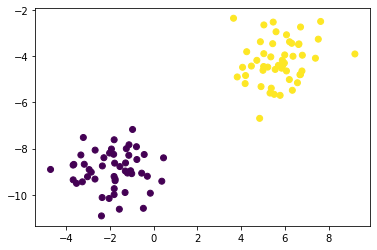

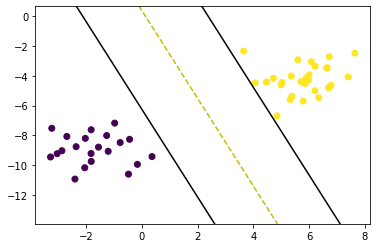

In [82]:
visualise_data()
visualize_svm()